This notebook goes along with the Deep Learning using Keras tutorial on Medium.

- [Keras tutorial: classification](https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37)

In [18]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

### In this model, we are going to predict if patients have diabetes or not.

> The data set used for the purpose of this study is Pima Indians Diabetes Database of National Institute of Diabetes and Digestive and Kidney Diseases. This diabetes database, donated by Vincent Sigillito, is a collection of medical diagnostic reports of 768 examples from a population living near Phoenix, Arizona, USA.

In [19]:
# read in training data
diabetes_df = pd.read_csv('diabetes_data.csv')

# view data structure
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# create a dataframe with all training data except the target column
data_X = diabetes_df.drop(columns=['diabetes'])

# check that the target variable has been removed
data_X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [21]:
# one-hot encode target column
data_y = to_categorical(diabetes_df.diabetes)

# check that target column has been converted
diabetes_df.diabetes[:5],data_y[:5]

(0    1
 1    0
 2    1
 3    0
 4    1
 Name: diabetes, dtype: int64, array([[0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.]], dtype=float32))

### Simple model

In [22]:
# create simple model with light model capacity 
model_s = Sequential()  # simple model

#get number of columns in training data
n_cols = data_X.shape[1]
print(n_cols)
#add layers to model
model_s.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model_s.add(Dense(10, activation='relu'))
model_s.add(Dense(2, activation='softmax'))

8


In [23]:
# compile model using accuracy to measure model performance
model_s.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [24]:
model_s.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 22        
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


In [25]:
# train model with all data
model_s.fit(data_X, data_y, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 614 samples, validate on 154 samples
Epoch 1/30
614/614 [==============================] - 0s 264us/step - loss: 3.4499 - acc: 0.5831 - val_loss: 2.2430 - val_acc: 0.6429
Epoch 2/30
614/614 [==============================] - 0s 36us/step - loss: 3.0086 - acc: 0.5651 - val_loss: 2.0097 - val_acc: 0.6494
Epoch 3/30
614/614 [==============================] - 0s 36us/step - loss: 2.7587 - acc: 0.5977 - val_loss: 1.6754 - val_acc: 0.6364
Epoch 4/30
614/614 [==============================] - 0s 36us/step - loss: 2.5559 - acc: 0.5798 - val_loss: 1.4725 - val_acc: 0.6364
Epoch 5/30
614/614 [==============================] - 0s 37us/step - loss: 2.2662 - acc: 0.5928 - val_loss: 1.3329 - val_acc: 0.6688
Epoch 6/30
614/614 [==============================] - 0s 36us/step - loss: 1.9893 - acc: 0.6124 - val_loss: 1.2457 - val_acc: 0.7143
Epoch 7/30
614/614 [==============================] - 0s 36us/step - loss: 1.7537 - acc: 0.6384 - val_loss: 1.1673 - val_acc: 0.7013
Epoch 8/30
614/614 [==

### Increase model capacity

In [26]:
# training a new model on the same data to show the effect of increasing model capacity
model_b = Sequential()

#get number of columns in training data
n_cols = data_X.shape[1]

#add layers to model
model_b.add(Dense(250, activation='relu', input_shape=(n_cols,)))
model_b.add(Dense(100, activation='relu'))
model_b.add(Dense(25, activation='relu'))
model_b.add(Dense(2, activation='softmax'))

In [27]:
model_b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 250)               2250      
_________________________________________________________________
dense_15 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_16 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 52        
Total params: 29,927
Trainable params: 29,927
Non-trainable params: 0
_________________________________________________________________


In [28]:
# compile model using accuracy to measure model performance
model_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [29]:
# fit model
model_b.fit(data_X, data_y, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 614 samples, validate on 154 samples
Epoch 1/30
614/614 [==============================] - 0s 345us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 2/30
614/614 [==============================] - 0s 47us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 3/30
614/614 [==============================] - 0s 49us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 4/30
614/614 [==============================] - 0s 47us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429


### Test of model_s and model_b

> Split dataframe into the train and test set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576, 2), (192, 2))

### small model: model_s1

In [33]:
# create simple model
model_s1 = Sequential()  # simple model

#get number of columns in training data
n_cols = X_train.shape[1]

#add layers to model
model_s1.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model_s1.add(Dense(10, activation='relu'))
model_s1.add(Dense(2, activation='softmax'))

In [34]:
# compile model using accuracy to measure model performance
model_s1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [35]:
# train model
hist = model_s1.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor])  # validation_split=0.2

Train on 576 samples, validate on 192 samples
Epoch 1/30
576/576 [==============================] - 0s 371us/step - loss: 1.7515 - acc: 0.4948 - val_loss: 1.2201 - val_acc: 0.6198
Epoch 2/30
576/576 [==============================] - 0s 36us/step - loss: 1.0978 - acc: 0.6337 - val_loss: 1.0918 - val_acc: 0.6406
Epoch 3/30
576/576 [==============================] - 0s 36us/step - loss: 0.9524 - acc: 0.6076 - val_loss: 0.9550 - val_acc: 0.5938
Epoch 4/30
576/576 [==============================] - 0s 35us/step - loss: 0.8912 - acc: 0.6111 - val_loss: 0.8767 - val_acc: 0.6406
Epoch 5/30
576/576 [==============================] - 0s 35us/step - loss: 0.8276 - acc: 0.6337 - val_loss: 0.8432 - val_acc: 0.6302
Epoch 6/30
576/576 [==============================] - 0s 36us/step - loss: 0.7892 - acc: 0.6441 - val_loss: 0.8160 - val_acc: 0.6458
Epoch 7/30
576/576 [==============================] - 0s 35us/step - loss: 0.7528 - acc: 0.6562 - val_loss: 0.8044 - val_acc: 0.6250
Epoch 8/30
576/576 [==

In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

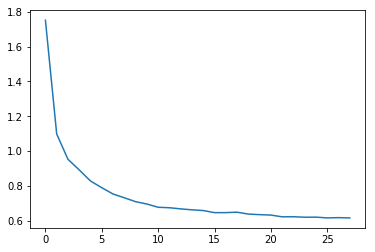

In [37]:
# Plot performance
plt.plot(hist.history['loss'])
plt.show()

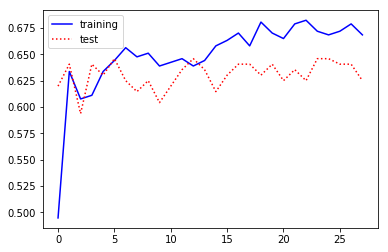

In [38]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [39]:
# 전체 테스트 데이터에 대한 예측
x_pred = model_s1.predict_classes(X_test, verbose=1)

192/192 [==============================] - 0s 479us/step


In [40]:
x_pred,np.argmax(y_test, axis=1)

(array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [42]:
true_y=np.argmax(y_test, axis=1)  # decode one-hot encoding

In [43]:
t_count = np.sum(x_pred==true_y) # True positive
f_count = np.sum(x_pred!=true_y) # False positive
f_count==len(true_y)-t_count

True

In [44]:
t_count,f_count

(120, 72)

In [45]:
accuracy = t_count/len(true_y)*100
accuracy

62.5

### Big model: model_b1

In [46]:
#create model with larger capacity
model_b1 = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add layers to model
model_b1.add(Dense(250, activation='relu', input_shape=(n_cols,)))
model_b1.add(Dense(250, activation='relu'))
model_b1.add(Dense(25, activation='relu'))
model_b1.add(Dense(2, activation='softmax'))

In [47]:
# compile model using accuracy to measure model performance
model_b1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [48]:
# train model
hist = model_b1.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor])  # validation_split=0.2

Train on 576 samples, validate on 192 samples
Epoch 1/30
576/576 [==============================] - 0s 474us/step - loss: 3.2679 - acc: 0.5972 - val_loss: 3.3753 - val_acc: 0.6510
Epoch 2/30
576/576 [==============================] - 0s 59us/step - loss: 3.2016 - acc: 0.6198 - val_loss: 3.2040 - val_acc: 0.6562
Epoch 3/30
576/576 [==============================] - 0s 62us/step - loss: 3.0119 - acc: 0.6545 - val_loss: 3.0456 - val_acc: 0.6667
Epoch 4/30
576/576 [==============================] - 0s 62us/step - loss: 2.1045 - acc: 0.6458 - val_loss: 1.0551 - val_acc: 0.6354
Epoch 5/30
576/576 [==============================] - 0s 62us/step - loss: 0.7165 - acc: 0.6493 - val_loss: 0.9604 - val_acc: 0.6458
Epoch 6/30
576/576 [==============================] - 0s 62us/step - loss: 0.6224 - acc: 0.6562 - val_loss: 0.6856 - val_acc: 0.6562
Epoch 7/30
576/576 [==============================] - 0s 62us/step - loss: 0.5895 - acc: 0.6580 - val_loss: 0.6768 - val_acc: 0.6615
Epoch 8/30
576/576 [==

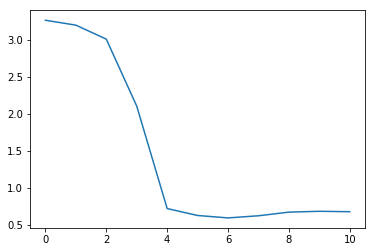

In [49]:
# Plot performance
plt.plot(hist.history['loss'])
plt.show()

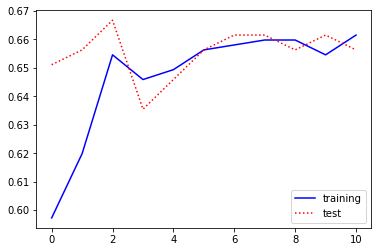

In [50]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [51]:
# 전체 테스트 데이터에 대한 예측
x_pred = model_b1.predict_classes(X_test, verbose=1)

192/192 [==============================] - 0s 515us/step


In [52]:
x_pred,np.argmax(y_test, axis=1)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [53]:
true_y=np.argmax(y_test, axis=1)

In [54]:
t_count = np.sum(x_pred==true_y) # True positive
f_count = np.sum(x_pred!=true_y) # False positive
f_count==len(true_y)-t_count

True

In [55]:
t_count,f_count

(126, 66)

In [56]:
accuracy = t_count/len(true_y)*100
accuracy

65.625

### Model with large capacity is slightly better than the model with small capacity.